In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *

In [2]:
data=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\35\case_time_series.csv")
data.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [3]:
data[data.duplicated()]

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased


In [4]:
data_aug=data[184:]
data_aug.reset_index(inplace=True,drop=True)
data_aug

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,01 August,55117,1752185,51368,1146906,854,37420
1,02 August,52672,1804857,40355,1187261,760,38180
2,03 August,50488,1855345,43070,1230331,806,38986
3,04 August,51282,1906627,51220,1281551,849,39835
4,05 August,56626,1963253,45583,1327134,919,40754
5,06 August,62170,2025423,50141,1377275,899,41653


In [5]:
count1=0
for i in list(data_aug.columns):
    if((True== "NaN" in data_aug[i])or (True == "" in data_aug[i]) or (True == " " in data_aug[i]) or (True == "?" in  data_aug[i])or (True == "####" in data_aug[i])):
        count1=count1+1
if(count1):
    print("yes")
    

In [6]:
colls=data_aug.columns
colls

Index(['Date', 'Daily Confirmed', 'Total Confirmed', 'Daily Recovered',
       'Total Recovered', 'Daily Deceased', 'Total Deceased'],
      dtype='object')

In [7]:
for i in range(len(data_aug)):
    data_aug["Date"][i]=data_aug["Date"][i].strip(" August")

for i in range(len(data_aug)):
    data_aug["Date"][i]="2020-07-"+data_aug["Date"][i]

    
data_aug['Date'] = data_aug['Date'].astype('datetime64[ns]') 
data_aug.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,55117,1752185,51368,1146906,854,37420
1,2020-07-02,52672,1804857,40355,1187261,760,38180
2,2020-07-03,50488,1855345,43070,1230331,806,38986
3,2020-07-04,51282,1906627,51220,1281551,849,39835
4,2020-07-05,56626,1963253,45583,1327134,919,40754


In [8]:
data_aug.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
1,2020-07-02,52672,1804857,40355,1187261,760,38180
2,2020-07-03,50488,1855345,43070,1230331,806,38986
3,2020-07-04,51282,1906627,51220,1281551,849,39835
4,2020-07-05,56626,1963253,45583,1327134,919,40754
5,2020-07-06,62170,2025423,50141,1377275,899,41653


In [9]:
data_aug.to_excel("coviddata_aug.xlsx")

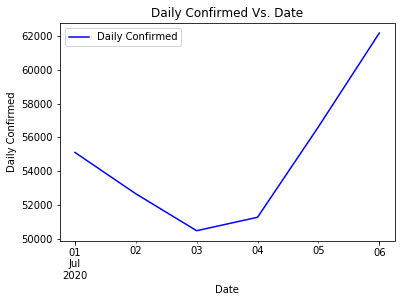

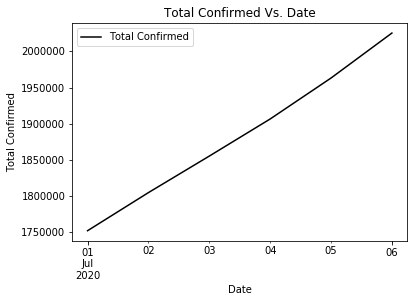

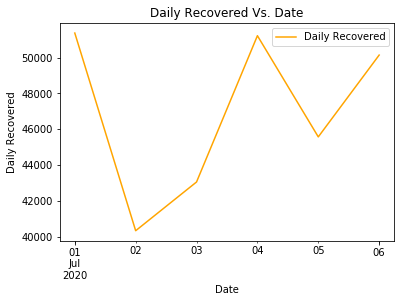

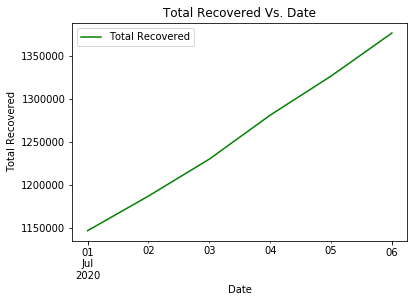

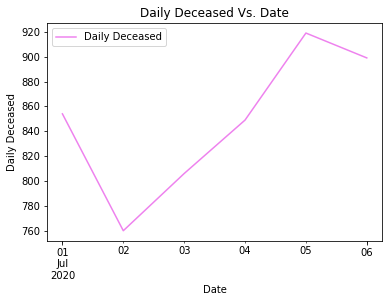

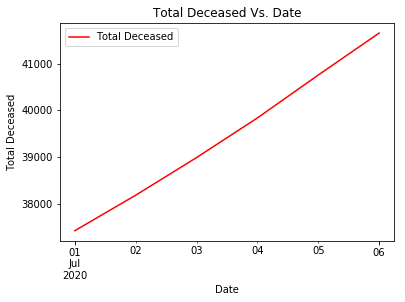

In [10]:
colss=list(data_aug.columns)
colss.pop(0)
for m,n in zip(colss,["blue","black","orange","green","violet","red"]):
    data_aug.plot(x="Date",y=m,color=n)
    plt.title(m +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(m)
    



In [11]:
dataaug_for_scattering=data_aug.copy()
dataaug_for_scattering.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,55117,1752185,51368,1146906,854,37420
1,2020-07-02,52672,1804857,40355,1187261,760,38180
2,2020-07-03,50488,1855345,43070,1230331,806,38986
3,2020-07-04,51282,1906627,51220,1281551,849,39835
4,2020-07-05,56626,1963253,45583,1327134,919,40754


In [12]:
dataaug_for_scattering["Date_tmp"]=pd.Series(list(range(1,len(dataaug_for_scattering)+1)),index=list(range(0,len(dataaug_for_scattering))))
dataaug_for_scattering['Date_tmp'] = dataaug_for_scattering['Date_tmp'].astype('int')
colls=list(dataaug_for_scattering.columns)
colls.pop(0)
colls.pop(len(colls)-1)
dataaug_for_scattering.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Date_tmp
0,2020-07-01,55117,1752185,51368,1146906,854,37420,1
1,2020-07-02,52672,1804857,40355,1187261,760,38180,2
2,2020-07-03,50488,1855345,43070,1230331,806,38986,3
3,2020-07-04,51282,1906627,51220,1281551,849,39835,4
4,2020-07-05,56626,1963253,45583,1327134,919,40754,5


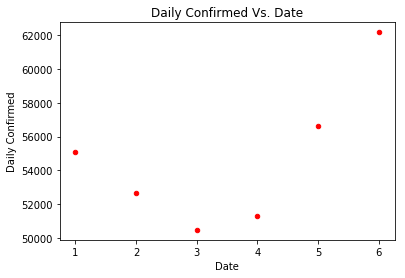

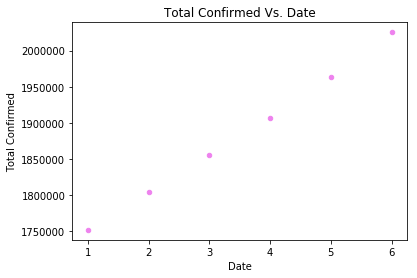

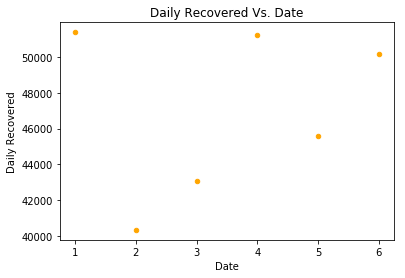

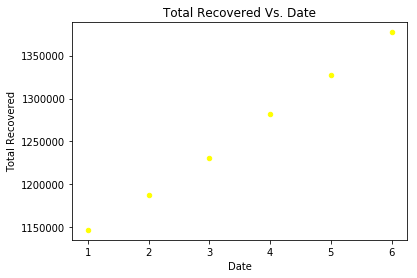

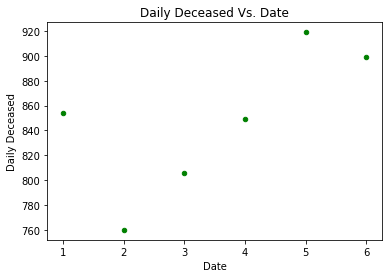

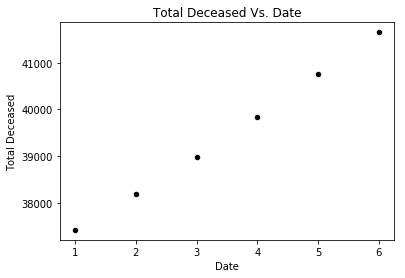

In [13]:
colors=["Red","Violet","Orange","Yellow","Green","Black"]
for i,j in zip(colls,colors):
    dataaug_for_scattering.plot(x="Date_tmp",y=i,kind="scatter",color=j)
    plt.title(i +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(i)

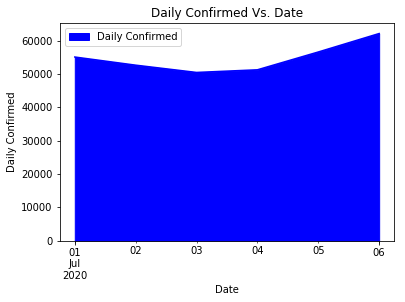

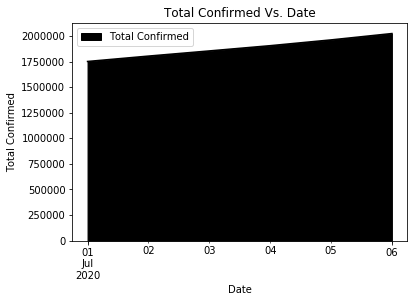

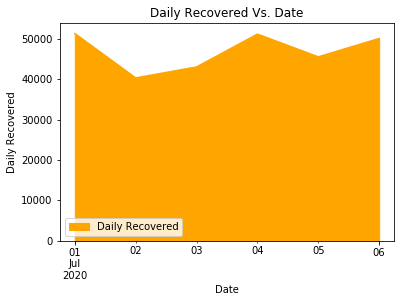

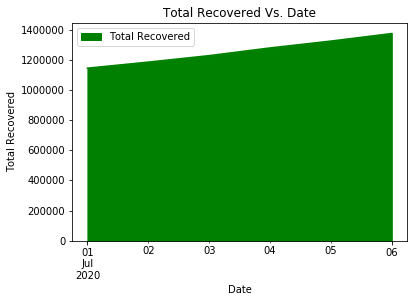

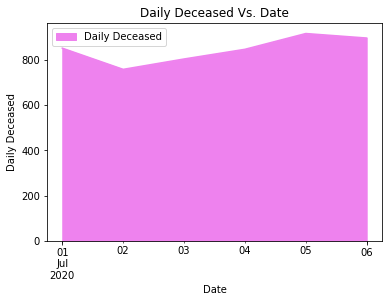

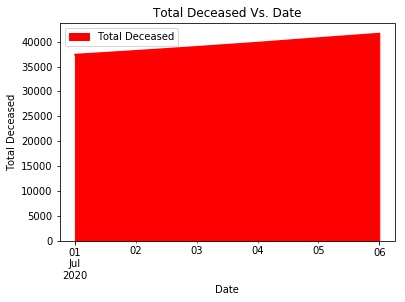

In [14]:
colss=list(data_aug.columns)
colss.pop(0)
for m,n in zip(colss,["blue","black","orange","green","violet","red"]):
    data_aug.plot(x="Date",y=m,color=n,kind="area")
    plt.title(m +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(m)

In [15]:
dataaug_diff=data_aug.copy()
dataaug_diff.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,55117,1752185,51368,1146906,854,37420
1,2020-07-02,52672,1804857,40355,1187261,760,38180
2,2020-07-03,50488,1855345,43070,1230331,806,38986
3,2020-07-04,51282,1906627,51220,1281551,849,39835
4,2020-07-05,56626,1963253,45583,1327134,919,40754


In [16]:
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
existing_cols=list(dataaug_diff.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[57212,1696794,36554,1095538,764,36566]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    dataaug_diff[i]=list(range(len(dataaug_diff)))
    dataaug_diff[i][0]=dataaug_diff[j][0]-l
    for k in range(0,len(dataaug_diff)-1):
        dataaug_diff[i][k+1]=dataaug_diff[j][k+1]-dataaug_diff[j][k]
        

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [17]:
dataaug_diff.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
1,2020-07-02,52672,1804857,40355,1187261,760,38180,-2445,52672,-11013,40355,-94,760
2,2020-07-03,50488,1855345,43070,1230331,806,38986,-2184,50488,2715,43070,46,806
3,2020-07-04,51282,1906627,51220,1281551,849,39835,794,51282,8150,51220,43,849
4,2020-07-05,56626,1963253,45583,1327134,919,40754,5344,56626,-5637,45583,70,919
5,2020-07-06,62170,2025423,50141,1377275,899,41653,5544,62170,4558,50141,-20,899


In [18]:
dataaug_diff["Total Confirmed"][1]-dataaug_diff["Total Confirmed"][0]==dataaug_diff["Total_Confirmed_Diff"][1]

True

In [19]:
dataaug_diff.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
count,6.000000,6.000000e+00,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,54725.833333,1.884615e+06,46956.166667,1.258410e+06,847.833333,39471.333333,826.333333,54771.500000,2264.500000,46956.166667,22.500000,847.833333
std,4317.793715,1.012434e+05,4655.126010,8.679992e+04,58.629060,1590.485167,3767.350616,4324.202481,9341.497326,4655.126010,68.063941,58.629060
min,50488.000000,1.752185e+06,40355.000000,1.146906e+06,760.000000,37420.000000,-2445.000000,50488.000000,-11013.000000,40355.000000,-94.000000,760.000000
25%,51629.500000,1.817479e+06,43698.250000,1.198028e+06,816.750000,38381.500000,-2161.750000,51629.500000,-3549.000000,43698.250000,-4.250000,816.750000
50%,53894.500000,1.880986e+06,47862.000000,1.255941e+06,851.500000,39410.500000,-650.500000,54031.500000,3636.500000,47862.000000,44.500000,851.500000
75%,56248.750000,1.949096e+06,50950.250000,1.315738e+06,887.750000,40524.250000,4206.500000,56317.250000,7252.000000,50950.250000,64.000000,887.750000
max,62170.000000,2.025423e+06,51368.000000,1.377275e+06,919.000000,41653.000000,5544.000000,62170.000000,14814.000000,51368.000000,90.000000,919.000000


In [20]:
kys=["daily_cnf_diff_pos_neg","total_cnf_diff_pos_neg","daily_rcvd_diff_pos_neg","total_rcvd_diff_pos_neg","daily_dcsd_diff_pos_neg","total_dcsd_diff_pos_neg"]
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
pos_neg_dict={}
pos_neg_len_dict={}
a=[]
b=[]
for i,j in zip(kys,new_cols):
    pos=dataaug_diff[dataaug_diff[j]>0]
    a.append(pos)
    b.append(len(pos))
    neg=dataaug_diff[dataaug_diff[j]<0]
    a.append(neg)
    b.append(len(neg))
    zro=dataaug_diff[dataaug_diff[j]==0]
    a.append(zro)
    b.append(len(zro))
    pos_neg_dict.update({i:a})
    pos_neg_len_dict.update({i:b})
    a=[]
    b=[]



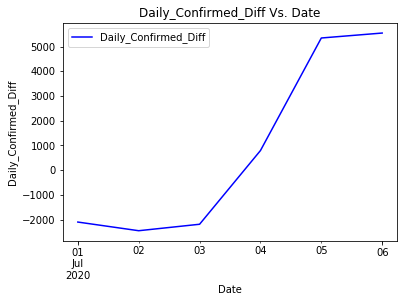

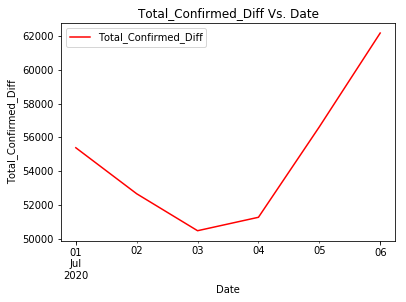

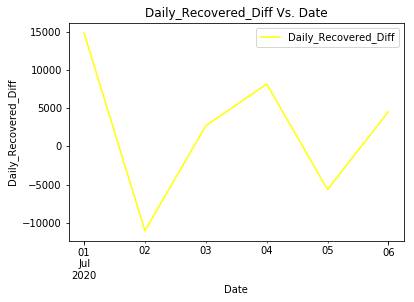

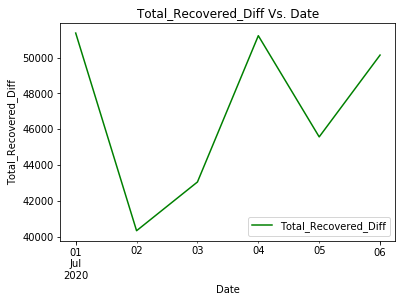

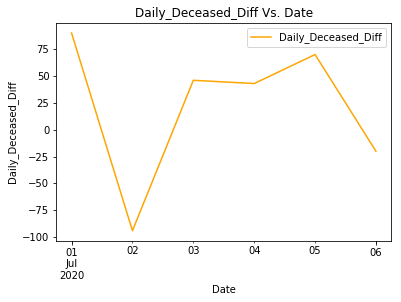

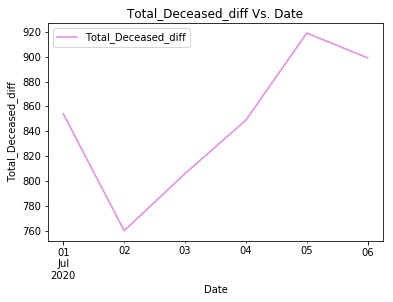

In [21]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dataaug_diff.plot(x="Date",y=i,color=j)
    plt.title(i +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(i)
    

In [22]:
dataaug_diff.to_excel("dataaug_diff.xlsx")

In [23]:
dataaug_ratio_with_precision=data_aug.copy()
dataaug_ratio_with_precision.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,55117,1752185,51368,1146906,854,37420
1,2020-07-02,52672,1804857,40355,1187261,760,38180
2,2020-07-03,50488,1855345,43070,1230331,806,38986
3,2020-07-04,51282,1906627,51220,1281551,849,39835
4,2020-07-05,56626,1963253,45583,1327134,919,40754


In [24]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(dataaug_ratio_with_precision.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[57212,1696794,36554,1095538,764,36566]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    dataaug_ratio_with_precision[i]=list(range(len(dataaug_ratio_with_precision)))
    dataaug_ratio_with_precision[i][0]=round(dataaug_ratio_with_precision[j][0]/l,2)
    tmp=[]
    tmp.append(dataaug_ratio_with_precision[i][0])
    for k in range(0,len(dataaug_ratio_with_precision)-1):
        tmp.append(round(dataaug_ratio_with_precision[j][k+1]/dataaug_ratio_with_precision[j][k],2))
    dataaug_ratio_with_precision[i]=tmp
dataaug_ratio_with_precision.head()
        

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-07-01,55117,1752185,51368,1146906,854,37420,0.00,1.00,1.00,1.00,1.00,1.00
1,2020-07-02,52672,1804857,40355,1187261,760,38180,0.96,1.03,0.79,1.04,0.89,1.02
2,2020-07-03,50488,1855345,43070,1230331,806,38986,0.96,1.03,1.07,1.04,1.06,1.02
3,2020-07-04,51282,1906627,51220,1281551,849,39835,1.02,1.03,1.19,1.04,1.05,1.02
4,2020-07-05,56626,1963253,45583,1327134,919,40754,1.10,1.03,0.89,1.04,1.08,1.02


In [25]:
round(dataaug_ratio_with_precision["Total Confirmed"][1]/dataaug_ratio_with_precision["Total Confirmed"][0],2)==dataaug_ratio_with_precision["Total_Confirmed_Ratio"][1]

True

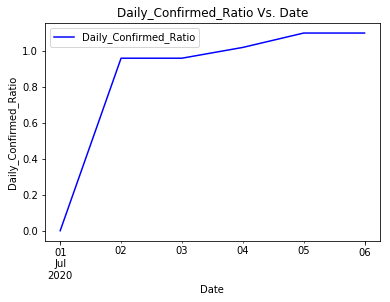

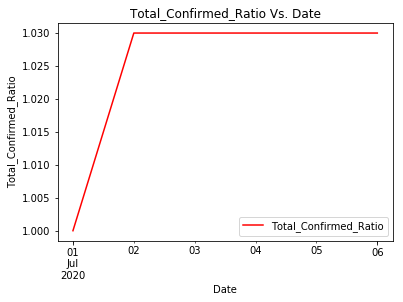

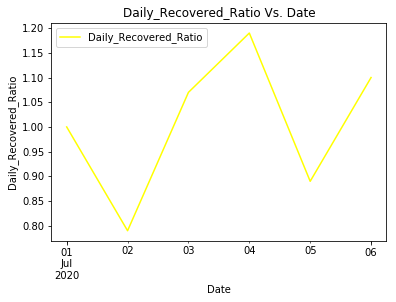

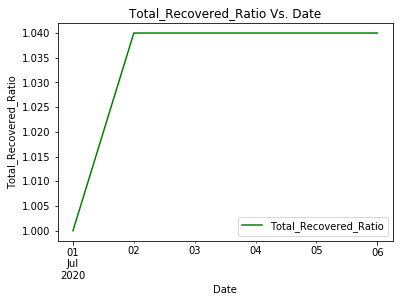

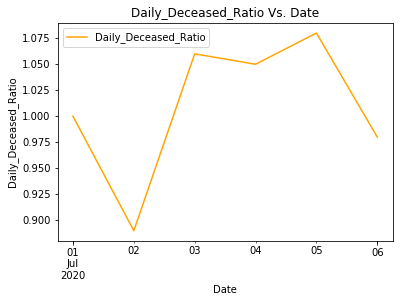

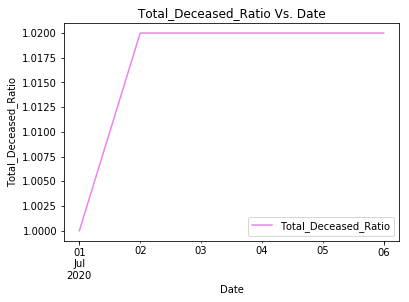

In [26]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dataaug_ratio_with_precision.plot(x="Date",y=i,color=j)
    plt.title(i +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(i)

In [27]:
dataaug_ratio_with_precision.to_excel("dataaug_ratio_with_precision.xlsx")

In [28]:
dataaug_ratio=data_aug.copy()
dataaug_ratio.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,55117,1752185,51368,1146906,854,37420
1,2020-07-02,52672,1804857,40355,1187261,760,38180
2,2020-07-03,50488,1855345,43070,1230331,806,38986
3,2020-07-04,51282,1906627,51220,1281551,849,39835
4,2020-07-05,56626,1963253,45583,1327134,919,40754


In [29]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(dataaug_ratio.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[57212,1696794,36554,1095538,764,36566]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    dataaug_ratio[i]=list(range(len(dataaug_ratio)))
    dataaug_ratio[i][0]=dataaug_ratio[j][0]/l
    tmp=[]
    tmp.append(dataaug_ratio[i][0])
    for k in range(0,len(dataaug_ratio)-1):
        tmp.append(dataaug_ratio[j][k+1]/dataaug_ratio[j][k])
    dataaug_ratio[i]=tmp
dataaug_ratio.head()
        

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-07-01,55117,1752185,51368,1146906,854,37420,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2020-07-02,52672,1804857,40355,1187261,760,38180,0.955640,1.030061,0.785606,1.035186,0.889930,1.020310
2,2020-07-03,50488,1855345,43070,1230331,806,38986,0.958536,1.027973,1.067278,1.036277,1.060526,1.021111
3,2020-07-04,51282,1906627,51220,1281551,849,39835,1.015727,1.027640,1.189227,1.041631,1.053350,1.021777
4,2020-07-05,56626,1963253,45583,1327134,919,40754,1.104208,1.029700,0.889945,1.035569,1.082450,1.023070


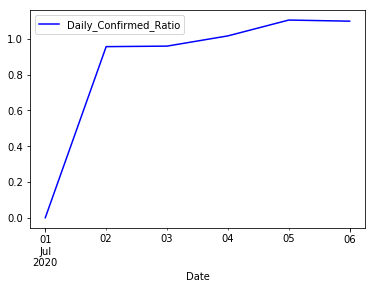

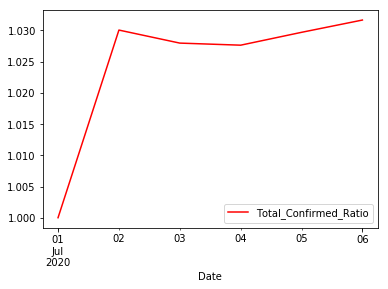

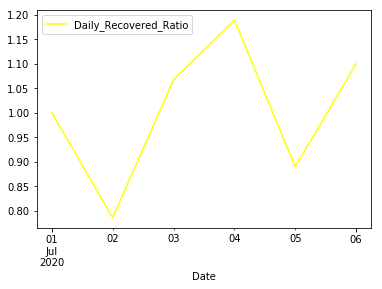

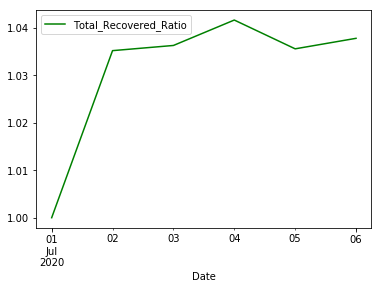

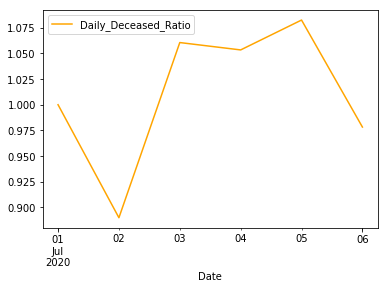

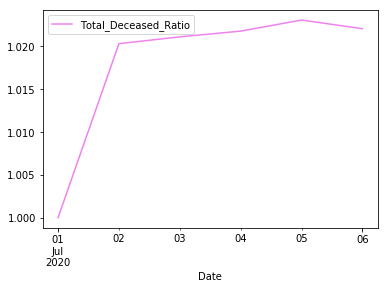

In [30]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dataaug_ratio.plot(x="Date",y=i,color=j)

In [31]:
kys=["daily_cnf_diff_rat10","total_cnf_diff_rat10","daily_rcvd_diff_rat10","total_rcvd_diff_rat10","daily_dcsd_diff_rat10","total_dcsd_diff_rat10"]
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
one_zro_dict={}
one_zro_len_dict={}
a=[]
b=[]
for i,j in zip(kys,new_cols):
    pos=dataaug_ratio[dataaug_ratio[j]>=1]
    a.append(pos)
    b.append(len(pos))
    neg=dataaug_ratio[dataaug_ratio[j]<1]
    a.append(neg)
    b.append(len(neg))
    zro=dataaug_ratio[dataaug_ratio[j]==0]
    a.append(zro)
    b.append(len(zro))
    one_zro_dict.update({i:a})
    one_zro_len_dict.update({i:b})
    a=[]
    b=[]




In [34]:
dataaug_ratio.to_excel("dataaug_ratio.xlsx")

In [33]:
dataaug_ratio_analysis=data_aug.copy()
dataaug_ratio_analysis.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,55117,1752185,51368,1146906,854,37420
1,2020-07-02,52672,1804857,40355,1187261,760,38180
2,2020-07-03,50488,1855345,43070,1230331,806,38986
3,2020-07-04,51282,1906627,51220,1281551,849,39835
4,2020-07-05,56626,1963253,45583,1327134,919,40754
